<a href="https://colab.research.google.com/github/praveenmarish/artificial_nural_network-/blob/master/work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [2]:
model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 16s 0us/step


In [0]:
model_1 = keras.models.Sequential()
for layer in model.layers:
  model_1.add(layer)

In [4]:
model_1._layers.pop()

In [0]:
model_1.add(keras.layers.Dense(1))

In [6]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
model_1.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [4]:
!ls
%cd drive/My\ Drive/project/Camera\ Roll/

drive  sample_data
/content/drive/My Drive/project/Camera Roll


In [9]:
!ls

desktop.ini  test  train  validate  WIN_20200518_13_38_08_Pro.jpg


In [0]:
train_dir='train'
test_dir='validate'
BATCH_SIZE=100
IMG_SHAPE  = 224

In [0]:
classes=['marish']

In [5]:
image_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                         horizontal_flip=True,
                                                         rotation_range=45,
                                                         width_shift_range=.15,
                                                         height_shift_range=.15,
                                                         zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               class_mode='sparse')

Found 7 images belonging to 2 classes.


In [6]:
image_gen_val = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validate_data_gen=image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                directory=test_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse')

Found 3 images belonging to 2 classes.


In [0]:
total_train=7
total_validate=3

In [0]:
model_2 = keras.models.Sequential()

model_2.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model_2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_2.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model_2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_2.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model_2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dropout(0.2))
model_2.add(keras.layers.Dense(512, activation='relu'))

model_2.add(keras.layers.Dropout(0.2))
model_2.add(keras.layers.Dense(2))

In [0]:
model_2.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
epochs=200
history = model_2.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=validate_data_gen,
    validation_steps=int(np.ceil(total_validate / float(BATCH_SIZE)))
)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.7267 - accuracy: 0.2857 - val_loss: 1.3027 - val_accuracy: 0.6667
Epoch 2/200
1/1 [==============================] - 0s 69ms/step - loss: 2.0454 - accuracy: 0.5714 - val_loss: 3.9595 - val_accuracy: 0.3333
Epoch 3/200
1/1 [==============================] - 0s 237ms/step - loss: 2.5677 - accuracy: 0.4286 - val_loss: 1.2142 - val_accuracy: 0.3333
Epoch 4/200
1/1 [==============================] - 0s 288ms/step - loss: 0.9117 - accuracy: 0.4286 - val_loss: 0.5974 - val_accuracy: 0.6667
Epoch 5/200
1/1 [==============================] - 0s 292ms/step - loss: 0.6922 - accuracy: 0.5714 - val_loss: 0.7477 - val_accuracy: 0.6667
Epoch 6/200
1/1 [==============================] - 0s 293ms/step - loss: 0.9244 - accuracy: 0.5714 - val_loss: 0.5687 - val_accuracy: 0.6667
Epoch 7/200
1/1 [==============================] - 0s 312ms/step - loss: 0.7801 - accuracy: 0.5714 - val_loss: 0.5735 - val_accuracy: 0.6667
Epoch 8/200
1/1 [

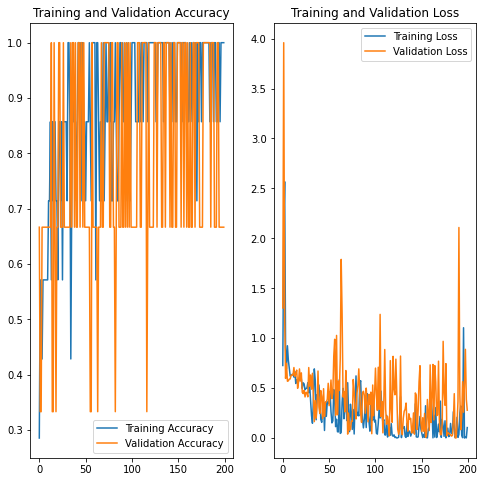

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
!ls
result=None

desktop.ini  test  train  validate


In [12]:
test = image_gen.flow_from_directory(directory="test",
                                     batch_size=BATCH_SIZE,
                                     target_size=(IMG_SHAPE,IMG_SHAPE))

Found 1 images belonging to 1 classes.


In [0]:
result=model_2.predict(test)

In [15]:
print(result)

[[ 1.6187909 -2.308504 ]]


In [0]:
print(test)
plt.plot(test)

In [0]:
!ls

desktop.ini  test  train  validate  WIN_20200518_13_38_08_Pro.jpg


In [16]:
%cd train/marish/

/content/drive/My Drive/project/Camera Roll/train/marish


In [59]:
!ls

WIN_20200514_12_02_24_Pro.jpg  WIN_20200514_12_02_31_Pro.jpg
WIN_20200514_12_02_27_Pro.jpg  WIN_20200514_12_02_33_Pro.jpg


In [0]:
image=Image.open("WIN_20200514_12_02_24_Pro.jpg")

In [0]:
imsize=(224,224)
image=image.resize(imsize)

In [0]:
image=keras.preprocessing.image.img_to_array(image)

In [0]:
image=np.expand_dims(image,axis=0)

In [0]:
result=model_2.predict(image)

In [22]:
print(result)

[[-299.80527  213.86058]]


In [43]:
result[0]

array([nan], dtype=float32)